In [1]:
!pip install -U duckduckgo_search
!pip install fastcore
!pip install fastdownload
!pip install fastai

import torch 
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
from duckduckgo_search import ddg_images
from fastcore.all import *
from pathlib import Path
from PIL import Image
from fastdownload import download_url
from fastai.vision.all import *
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [2]:
# gets urls to images from duckduckgo
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
# folder to store images
path = Path('gardenbirds')

In [4]:
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Get species list of river kingfishers from Wikipedia.

In [7]:
gardenbirds = {
    'robin': 'Erithacus rubecula',
    'collared dove': 'Streptopelia decaocto',
    'great tit': 'Parus major',
    'blue tit': 'Cyanistes caeruleus',
    'coal tit': 'Periparus ater',
    'goldfinch': 'Carduelis carduelis',
    'chaffinch': 'Fringilla coelebs',
    'wood pigeon': 'Columba palumbus',
    'blackbird': 'Turdus merula',
    'starling': 'Sturnus vulgaris',
    'house sparrow': 'Passer domesticus',
    'magpie': 'Pica pica',
    'carrion crow': 'Corvus corone',
    'european jay': 'Garrulus glandarius',
    'wren': 'Troglodytes troglodytes',
    'goldcrest': 'Regulus regulus',
    'dunnock': 'Prunella modularis',
    'long-tailed tit': 'Aegithalos caudatus',
    'greenfinch': 'Carduelis chloris',
    'green woodpecker': 'Picus viridis',
    'bullfinch': 'Pyrrhula pyrrhula',
    'common kingfisher': 'Alcedo atthis',
    'great spotted woodpecker': 'Dendrocopos major',
    'nuthatch': 'Sitta europaea',
    'redwing': 'Turdus iliacus',
    'blackcap': 'Sylvia atricapilla'
}

In [6]:
# river kingfishers
# # download table of river kingfishers from wikipedia page
# download_url('https://en.wikipedia.org/wiki/River_kingfisher', 'kingfisher.html', show_progress=False)
# # extract table from html
# soup = BeautifulSoup(open('kingfisher.html'), 'html.parser')
# table = soup.find('table', {'class':'wikitable'})
# # extract rows from table
# rows = table.find_all('tr')
# # extract cells from rows
# cells = [r.find_all('td') for r in rows]
# # extract text from cells
# text = [[c.text for c in r] for r in cells][2:]
# # remove newline characters
# kingfishers = [t[1].replace('\n', '') for t in text]
# # 35 species, scientific names only
# len(kingfishers), kingfishers[:5] 

Download images from DuckDuckGo for each species of kingfisher.

In [7]:
# # get 4 random species plus Alcedo atthis
# species = np.random.choice(kingfishers, 3, replace=False)
# species = np.append(species, 'Alcedo atthis')
# species

In [8]:
# clear folder
# !rm -rf kingfishers

In [7]:
# get list of latin names
latin_names = list(gardenbirds.values())
latin_names

['Erithacus rubecula',
 'Streptopelia decaocto',
 'Parus major',
 'Cyanistes caeruleus',
 'Periparus ater',
 'Carduelis carduelis',
 'Fringilla coelebs',
 'Columba palumbus',
 'Turdus merula',
 'Sturnus vulgaris',
 'Passer domesticus',
 'Pica pica',
 'Corvus corone',
 'Garrulus glandarius',
 'Troglodytes troglodytes',
 'Regulus regulus',
 'Prunella modularis',
 'Aegithalos caudatus',
 'Carduelis chloris',
 'Picus viridis',
 'Pyrrhula pyrrhula',
 'Alcedo atthis',
 'Dendrocopos major',
 'Sitta europaea',
 'Turdus iliacus',
 'Sylvia atricapilla']

In [8]:
from time import sleep

for o in latin_names:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images(o, max_images=50)
    download_images(dest, urls=search_images(f'{o}'), max_pics=40)
    sleep(2)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Erithacus rubecula'
Searching for 'Erithacus rubecula'
Searching for 'Streptopelia decaocto'
Searching for 'Streptopelia decaocto'
Searching for 'Parus major'
Searching for 'Parus major'
Searching for 'Cyanistes caeruleus'
Searching for 'Cyanistes caeruleus'
Searching for 'Periparus ater'
Searching for 'Periparus ater'
Searching for 'Carduelis carduelis'
Searching for 'Carduelis carduelis'
Searching for 'Fringilla coelebs'
Searching for 'Fringilla coelebs'
Searching for 'Columba palumbus'
Searching for 'Columba palumbus'
Searching for 'Turdus merula'
Searching for 'Turdus merula'
Searching for 'Sturnus vulgaris'
Searching for 'Sturnus vulgaris'
Searching for 'Passer domesticus'
Searching for 'Passer domesticus'
Searching for 'Pica pica'
Searching for 'Pica pica'
Searching for 'Corvus corone'
Searching for 'Corvus corone'
Searching for 'Garrulus glandarius'
Searching for 'Garrulus glandarius'
Searching for 'Troglodytes troglodytes'
Searching for 'Troglodytes troglodytes'


Find images that can't be opened and unlink them.

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

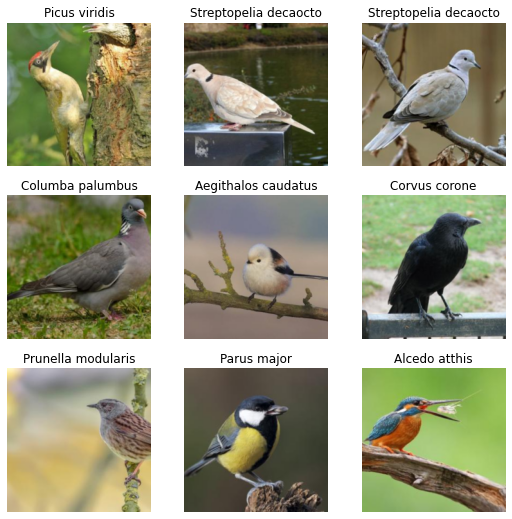

In [10]:
# show example images and labels
dls = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(224), bs=32)
dls.show_batch()
    

In [11]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
        transforms.RandomRotation(degrees=20),
        transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [12]:
path

Path('gardenbirds')

In [13]:
# the folder structure is gardenbirds/species_name. Make a dataset
# with the species name as the label
dataset = ImageFolder(path)
dataset

# split into train and validation sets  
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# add transforms
train_dataset.dataset.transform = data_transforms['train']
test_dataset.dataset.transform = data_transforms['val']
len(train_dataset), len(test_dataset)

# create dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [20]:
# class names
class_names = dataset.classes
class_names

['Aegithalos caudatus',
 'Alcedo atthis',
 'Carduelis carduelis',
 'Carduelis chloris',
 'Columba palumbus',
 'Corvus corone',
 'Cyanistes caeruleus',
 'Dendrocopos major',
 'Erithacus rubecula',
 'Fringilla coelebs',
 'Garrulus glandarius',
 'Parus major',
 'Passer domesticus',
 'Periparus ater',
 'Pica pica',
 'Picus viridis',
 'Prunella modularis',
 'Pyrrhula pyrrhula',
 'Regulus regulus',
 'Sitta europaea',
 'Streptopelia decaocto',
 'Sturnus vulgaris',
 'Sylvia atricapilla',
 'Troglodytes troglodytes',
 'Turdus iliacus',
 'Turdus merula']

In [14]:
# model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(latin_names))
model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [15]:
# train model function
def train_loop(model, criterion, optimizer, scheduler, num_epochs):
    train_losses, test_losses = [], []  # lists to store training and test losses
    for epoch in range(num_epochs):
        model.train()  # set the model to training mode
        size = len(train_loader.dataset)
        train_loss = 0.0  # initialize training loss for the epoch
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)
            
            # Compute prediction and loss
            pred = model(X)
            loss = criterion(pred, y)
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()  # accumulate training loss
            
            if batch % 10 == 0:
                loss, current = loss.item(), batch * len(X)
                accuracy = (pred.argmax(1) == y).type(torch.float).mean().item()
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
                print(f"Accuracy: {(100*accuracy):>0.1f}%")
                
        train_loss /= len(train_loader)  # compute average training loss for the epoch
        train_losses.append(train_loss)  # append training loss to the list
        
        model.eval()  # set the model to evaluation mode
        test_loss = 0.0  # initialize test loss for the epoch
        with torch.no_grad():  # deactivate gradient computation
            for batch, (X, y) in enumerate(test_loader):
                X, y = X.to(device), y.to(device)
                pred = model(X)
                loss = criterion(pred, y)
                test_loss += loss.item()  # accumulate test loss
                
        test_loss /= len(test_loader)  # compute average test loss for the epoch
        test_losses.append(test_loss)  # append test loss to the list
        
        # print training and test loss for the epoch
        print(f"epoch {epoch+1:>3d} | train_loss: {train_loss:.5f} | test_loss: {test_loss:.5f}")
        
    # plot training and test loss
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Test loss')
    plt.legend()
    plt.show()

loss: 3.309788  [    0/  628]
Accuracy: 3.1%
loss: 3.068805  [  320/  628]
Accuracy: 18.8%
epoch   1 | train_loss: 3.10977 | test_loss: 2.68800
loss: 2.242242  [    0/  628]
Accuracy: 46.9%
loss: 2.020402  [  320/  628]
Accuracy: 53.1%
epoch   2 | train_loss: 2.16008 | test_loss: 1.98056
loss: 1.555318  [    0/  628]
Accuracy: 71.9%
loss: 1.681114  [  320/  628]
Accuracy: 71.9%
epoch   3 | train_loss: 1.44663 | test_loss: 1.49680
loss: 1.110396  [    0/  628]
Accuracy: 93.8%
loss: 1.055975  [  320/  628]
Accuracy: 93.8%
epoch   4 | train_loss: 1.00251 | test_loss: 1.14465
loss: 0.791677  [    0/  628]
Accuracy: 100.0%
loss: 0.561679  [  320/  628]
Accuracy: 100.0%
epoch   5 | train_loss: 0.68258 | test_loss: 0.93755
loss: 0.664575  [    0/  628]
Accuracy: 100.0%
loss: 0.504014  [  320/  628]
Accuracy: 93.8%
epoch   6 | train_loss: 0.48293 | test_loss: 0.79852
loss: 0.354759  [    0/  628]
Accuracy: 100.0%
loss: 0.341086  [  320/  628]
Accuracy: 100.0%
epoch   7 | train_loss: 0.35423 | 

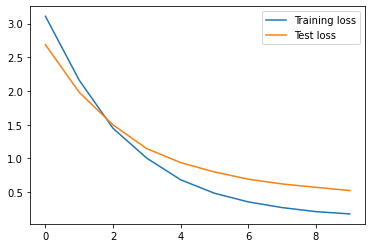

In [16]:
# train and validate
num_epochs = 10
train_loop(model, criterion, optimizer, exp_lr_scheduler, num_epochs)

In [30]:
# get class to idx mapping
class_to_idx = dataset.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}

In [31]:
idx_to_class[0]

'Aegithalos caudatus'

In [5]:
# load model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(idx_to_class))
model.load_state_dict(torch.load('gardenbirds.pth', map_location=torch.device('cpu')))
model.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'idx_to_class' is not defined

In [1]:
# predict class from image
def predict_class(model, image_path, class_names):
    model.eval()  # set the model to evaluation mode
    image = Image.open(image_path)  # load image
    image = data_transforms['val'](image)  # apply transforms
    image = image.unsqueeze(0)  # add batch dimension
    image = image.to(device)  # move image to device
    with torch.no_grad():  # deactivate gradient computation
        pred = model(image)  # predict class
        print(pred)
        pred = pred.argmax(1)  # get index of the class with the highest probability
        pred = pred.item()  # convert tensor to int
        pred = idx_to_class[pred]
    return pred

predict_class(model, 'gardenbirds/Corvus corone/28dc96fb-57b9-454a-b3c1-3fe9b7b1b5c8.JPG', latin_names)

NameError: name 'model' is not defined

In [36]:
# save model
torch.save(model.state_dict(), 'gardenbirds.pth')

# save class to idx mapping
with open('class_to_idx.json', 'w') as f:
    json.dump(class_to_idx, f)


In [14]:
import json
# sort gardenbirds dictionary by value (latin name)
gardenbirds_sorted = {k: v for k, v in sorted(gardenbirds.items(), key=lambda item: item[1])}
# save
with open('gardenbirds_sorted.json', 'w') as f:
    json.dump(gardenbirds_sorted, f)

In [19]:
# keys to list
list(gardenbirds_sorted.keys())

['long-tailed tit',
 'common kingfisher',
 'goldfinch',
 'greenfinch',
 'wood pigeon',
 'carrion crow',
 'blue tit',
 'great spotted woodpecker',
 'robin',
 'chaffinch',
 'european jay',
 'great tit',
 'house sparrow',
 'coal tit',
 'magpie',
 'green woodpecker',
 'dunnock',
 'bullfinch',
 'goldcrest',
 'nuthatch',
 'collared dove',
 'starling',
 'blackcap',
 'wren',
 'redwing',
 'blackbird']